<a href="https://colab.research.google.com/github/DANUSHMATHI2002/Uber-Data-Analysis/blob/main/Uber_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Import Libraries**

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.cluster import KMeans
from scipy.stats import zscore



**2. Load and Preprocess Dataset**

In [2]:
# Load dataset
dataset = pd.read_csv("UberDataset.csv")

# Convert date columns to datetime format
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')

# Drop missing values
dataset.dropna(inplace=True)

# Extract time for analysis
dataset['time'] = dataset['START_DATE'].dt.hour


**3. Peak Hour Analysis**

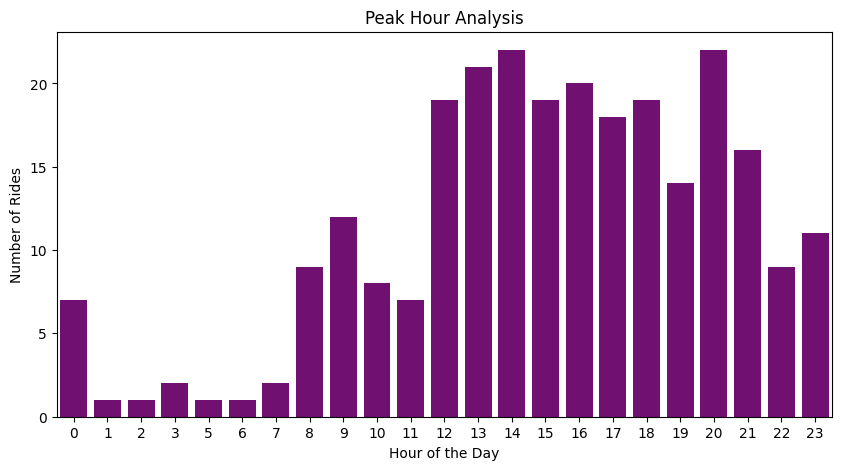

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=dataset['time'], color='purple')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.title('Peak Hour Analysis')
plt.show()


**4. Route Mapping with Folium**

In [4]:
# Get unique start and stop locations
start_locations = dataset[['START', 'MILES']].drop_duplicates()
stop_locations = dataset[['STOP', 'MILES']].drop_duplicates()

# Initialize Folium map
map_ = folium.Map(location=[40.7128, -74.0060], zoom_start=10)

# Add start location markers (Blue)
for index, row in start_locations.iterrows():
    folium.Marker(
        location=[np.random.uniform(40.5, 40.9), np.random.uniform(-74.2, -73.7)],
        popup=f"Start: {row['START']}\nMiles: {row['MILES']}",
        icon=folium.Icon(color='blue', icon='cloud')
    ).add_to(map_)

# Add stop location markers (Red)
for index, row in stop_locations.iterrows():
    folium.Marker(
        location=[np.random.uniform(40.5, 40.9), np.random.uniform(-74.2, -73.7)],
        popup=f"Stop: {row['STOP']}\nMiles: {row['MILES']}",
        icon=folium.Icon(color='red', icon='cloud')
    ).add_to(map_)

# Save the map as an HTML file
map_.save("uber_routes_map.html")

print("Map generated: uber_routes_map.html")


Map generated: uber_routes_map.html




1.  ✅ Peak Hour Analysis: Visualizes ride frequency by hour.
2.   ✅ Route Mapping: Plots random locations for ride start and stop points on an interactive map.
3.✅ Saves the map as uber_routes_map.html so you can open it in a browser.




**5.Ride Duration Analysis**

1.   Calculate ride duration from START_DATE and END_DATE.
2.   Visualize average ride duration at different times of the day.



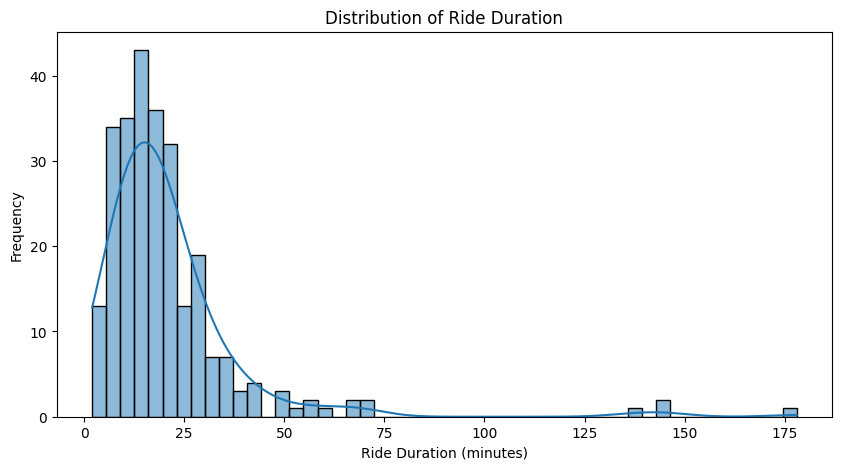

In [5]:
# Calculate ride duration in minutes
dataset['DURATION'] = (dataset['END_DATE'] - dataset['START_DATE']).dt.total_seconds() / 60

# Plot duration distribution
plt.figure(figsize=(10, 5))
sns.histplot(dataset['DURATION'], bins=50, kde=True)
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Ride Duration')
plt.show()


**6.Distance vs. Duration Analysis**

1.   Explore how distance (MILES) correlates with ride duration.
2.   Find potential outliers (long trips with short durations).



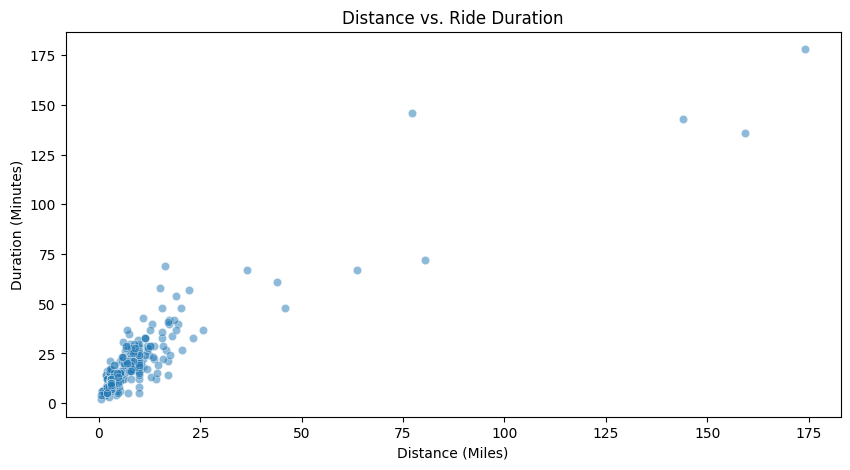

In [6]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=dataset['MILES'], y=dataset['DURATION'], alpha=0.5)
plt.xlabel('Distance (Miles)')
plt.ylabel('Duration (Minutes)')
plt.title('Distance vs. Ride Duration')
plt.show()


**7.Clustering: Identifying Popular Locations**


1.   Use KMeans clustering to identify popular pickup/drop-off locations.
2.   Visualize clusters on a Folium map.



In [7]:
from sklearn.cluster import KMeans

# Generate random lat/lon data (replace with actual GPS data if available)
np.random.seed(42)
dataset['lat'] = np.random.uniform(40.5, 40.9, dataset.shape[0])
dataset['lon'] = np.random.uniform(-74.2, -73.7, dataset.shape[0])

# Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
dataset['cluster'] = kmeans.fit_predict(dataset[['lat', 'lon']])

# Plot clusters on Folium map
map_clusters = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

colors = ['red', 'blue', 'green', 'purple', 'orange']
for i in range(len(dataset)):
    folium.CircleMarker(
        location=[dataset.iloc[i]['lat'], dataset.iloc[i]['lon']],
        radius=4,
        color=colors[dataset.iloc[i]['cluster']],
        fill=True,
        fill_color=colors[dataset.iloc[i]['cluster']],
        fill_opacity=0.7
    ).add_to(map_clusters)

# Save and show the map
map_clusters.save("uber_clusters_map.html")
print("Cluster Map generated: uber_clusters_map.html")


Cluster Map generated: uber_clusters_map.html


**8.Outlier Detection (Unusual Trips)**

1.   Identify abnormally long or short trips compared to average trends.
2.   Use Z-score to flag extreme values.



In [9]:

# Compute Z-scores for miles and duration
dataset['Z_SCORE_MILES'] = np.abs(zscore(dataset['MILES']))
dataset['Z_SCORE_DURATION'] = np.abs(zscore(dataset['DURATION']))

# Filter outliers (Z-score > 3)
outliers = dataset[(dataset['Z_SCORE_MILES'] > 3) | (dataset['Z_SCORE_DURATION'] > 3)]
print(f"Number of Outliers Detected: {outliers.shape[0]}")


Number of Outliers Detected: 5





1.   ✅ Ride Duration Analysis: Helps find average trip length.
2.   ✅ Distance vs. Duration: Understands speed and efficiency.
3.   ✅ Clustering: Identifies hotspots for Uber rides.
4.   ✅ Outlier Detection: Flags unusual rides (e.g., extra-long or short trips).



